In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.utils import make_grid
from torchvision import transforms as torch_transforms
from torch.distributions.bernoulli import Bernoulli

In [2]:
import sys
sys.path.append('./../')

from modules.vqvae.model import VQVAE

In [3]:
def show(img, figsize=(8, 4)):
    plt.figure(figsize=figsize)
    npimg = img.numpy()
    fig = plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [4]:
class Config:
    DEVICE                      = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img_channels                = 1
    vocab_size                  = 32
    embedding_dim               = 128
    commitment_cost             = 0.25
    decay                       = 0.99
    num_x2downsamples           = 2
    num_resids_downsample       = 2
    num_resids_bottleneck       = 4
    hidden_dim                  = 256
    
    NUM_EPOCHS                  = 100
    BATCH_SIZE                  = 512
    LR                          = 0.01
    quantizer_LR                = 0.1
    LR_gamma                    = 0.1
    step_LR_milestones          = [10, 40, 80]
    
    save_model_path             = "/m/home/home8/82/sukhoba1/data/Desktop/TA-VQVAE/models/vqvae_S_mnist/"
    model_name                  = "vqvae_S_mnist"
    data_path                   = "/m/home/home8/82/sukhoba1/data/Desktop/TA-VQVAE/data/MNIST/"

CONFIG = Config()

In [5]:
data_transforms = torch_transforms.Compose([
    torch_transforms.RandomRotation(10),
    torch_transforms.ToTensor()
])

trainset = datasets.MNIST(
    CONFIG.data_path, 
    train=True, 
    transform=data_transforms, 
    download=False)

train_loader = torch.utils.data.DataLoader(
    trainset,
    batch_size=CONFIG.BATCH_SIZE,
    shuffle=True)

In [6]:
model = VQVAE(
    img_channels=CONFIG.img_channels,
    num_embeddings=CONFIG.vocab_size,
    embedding_dim=CONFIG.embedding_dim,
    commitment_cost=CONFIG.commitment_cost,
    decay=CONFIG.decay,
    num_x2downsamples=CONFIG.num_x2downsamples,
    num_resid_downsample_layers=CONFIG.num_resids_downsample,
    num_resid_bottleneck_layers=CONFIG.num_resids_bottleneck,
    bias=True,
    use_batch_norm=True,
    use_conv1x1=False)

optimizer_encdec = optim.Adam(
    model.get_encoder_decoder_params(), 
    lr=CONFIG.LR)

optimizer_quantizer = optim.Adam(
    model.get_quantizer_params(), 
    lr=CONFIG.quantizer_LR)

lr_scheduler_encdec = MultiStepLR(
    optimizer_encdec,
    milestones=CONFIG.step_LR_milestones,
    gamma=CONFIG.LR_gamma)

lr_scheduler_quantizer = MultiStepLR(
    optimizer_quantizer, 
    milestones=CONFIG.step_LR_milestones, 
    gamma=CONFIG.LR_gamma)


Device in use: cuda
Epoch: 0 Iter: 39 Loss: 0.14596 Recon: 0.10044 VQ: 0.04552 Perplexity: 1.20393
Epoch: 0 Iter: 79 Loss: 0.09538 Recon: 0.09192 VQ: 0.00346 Perplexity: 1.01914
Epoch: 1 Iter: 119 Loss: 0.11513 Recon: 0.07689 VQ: 0.03824 Perplexity: 1.10697
Epoch: 1 Iter: 159 Loss: 0.12916 Recon: 0.0661 VQ: 0.06306 Perplexity: 1.2067
Epoch: 1 Iter: 199 Loss: 0.09081 Recon: 0.05613 VQ: 0.03468 Perplexity: 1.57488
Epoch: 2 Iter: 239 Loss: 0.06409 Recon: 0.04315 VQ: 0.02094 Perplexity: 1.91778
Epoch: 2 Iter: 279 Loss: 0.05257 Recon: 0.03583 VQ: 0.01674 Perplexity: 1.95101
Epoch: 2 Iter: 319 Loss: 0.04986 Recon: 0.03171 VQ: 0.01815 Perplexity: 1.96082
Epoch: 3 Iter: 359 Loss: 0.04815 Recon: 0.03066 VQ: 0.01748 Perplexity: 1.95689
Epoch: 3 Iter: 399 Loss: 0.0427 Recon: 0.02913 VQ: 0.01357 Perplexity: 1.9616
Epoch: 3 Iter: 439 Loss: 0.04317 Recon: 0.02873 VQ: 0.01444 Perplexity: 1.96524
Epoch: 4 Iter: 479 Loss: 0.03946 Recon: 0.02703 VQ: 0.01243 Perplexity: 1.96357
Epoch: 4 Iter: 519 Loss: 0

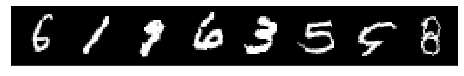

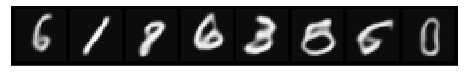

Epoch: 5 Iter: 599 Loss: 0.03972 Recon: 0.02531 VQ: 0.01442 Perplexity: 1.99324
Epoch: 5 Iter: 639 Loss: 0.03567 Recon: 0.02485 VQ: 0.01083 Perplexity: 1.97559
Epoch: 5 Iter: 679 Loss: 0.03677 Recon: 0.02426 VQ: 0.01251 Perplexity: 1.98116
Epoch: 6 Iter: 719 Loss: 0.03937 Recon: 0.0253 VQ: 0.01407 Perplexity: 1.99017
Epoch: 6 Iter: 759 Loss: 0.03544 Recon: 0.02429 VQ: 0.01115 Perplexity: 1.96344
Epoch: 6 Iter: 799 Loss: 0.03553 Recon: 0.02316 VQ: 0.01237 Perplexity: 1.98841
Epoch: 7 Iter: 839 Loss: 0.03202 Recon: 0.02237 VQ: 0.00965 Perplexity: 2.90024
Epoch: 7 Iter: 879 Loss: 0.04399 Recon: 0.02339 VQ: 0.0206 Perplexity: 2.83972
Epoch: 7 Iter: 919 Loss: 0.02095 Recon: 0.01571 VQ: 0.00524 Perplexity: 5.12241
Epoch: 8 Iter: 959 Loss: 0.01529 Recon: 0.01234 VQ: 0.00295 Perplexity: 5.42974
Epoch: 8 Iter: 999 Loss: 0.01388 Recon: 0.01125 VQ: 0.00263 Perplexity: 5.58123
Epoch: 8 Iter: 1039 Loss: 0.0133 Recon: 0.01117 VQ: 0.00214 Perplexity: 5.44709
Epoch: 9 Iter: 1079 Loss: 0.01267 Recon: 0

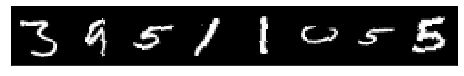

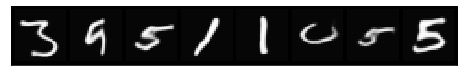

Epoch: 10 Iter: 1199 Loss: 0.01019 Recon: 0.00871 VQ: 0.00148 Perplexity: 9.6326
Epoch: 10 Iter: 1239 Loss: 0.00963 Recon: 0.00817 VQ: 0.00146 Perplexity: 10.35013
Epoch: 10 Iter: 1279 Loss: 0.00983 Recon: 0.00852 VQ: 0.00131 Perplexity: 10.48732
Epoch: 11 Iter: 1319 Loss: 0.00903 Recon: 0.00786 VQ: 0.00117 Perplexity: 14.15944
Epoch: 11 Iter: 1359 Loss: 0.00868 Recon: 0.0076 VQ: 0.00108 Perplexity: 14.27794
Epoch: 11 Iter: 1399 Loss: 0.00864 Recon: 0.00759 VQ: 0.00105 Perplexity: 14.9226
Epoch: 12 Iter: 1439 Loss: 0.00849 Recon: 0.00752 VQ: 0.00097 Perplexity: 15.75424
Epoch: 12 Iter: 1479 Loss: 0.00847 Recon: 0.00746 VQ: 0.00101 Perplexity: 16.16384
Epoch: 12 Iter: 1519 Loss: 0.00839 Recon: 0.00745 VQ: 0.00094 Perplexity: 16.27032
Epoch: 13 Iter: 1559 Loss: 0.00824 Recon: 0.0073 VQ: 0.00094 Perplexity: 16.82304
Epoch: 13 Iter: 1599 Loss: 0.00813 Recon: 0.00719 VQ: 0.00094 Perplexity: 17.08553
Epoch: 13 Iter: 1639 Loss: 0.00795 Recon: 0.00706 VQ: 0.00089 Perplexity: 18.20599
Epoch: 14

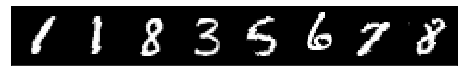

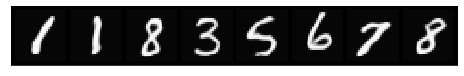

Epoch: 15 Iter: 1799 Loss: 0.00768 Recon: 0.00682 VQ: 0.00086 Perplexity: 18.79507
Epoch: 15 Iter: 1839 Loss: 0.00784 Recon: 0.00701 VQ: 0.00083 Perplexity: 18.86676
Epoch: 15 Iter: 1879 Loss: 0.00773 Recon: 0.00692 VQ: 0.00081 Perplexity: 18.64715
Epoch: 16 Iter: 1919 Loss: 0.0075 Recon: 0.00668 VQ: 0.00081 Perplexity: 19.09019
Epoch: 16 Iter: 1959 Loss: 0.00756 Recon: 0.00678 VQ: 0.00078 Perplexity: 18.24478
Epoch: 16 Iter: 1999 Loss: 0.00727 Recon: 0.00649 VQ: 0.00079 Perplexity: 18.78497
Epoch: 17 Iter: 2039 Loss: 0.00736 Recon: 0.00661 VQ: 0.00076 Perplexity: 19.13003
Epoch: 17 Iter: 2079 Loss: 0.00735 Recon: 0.00657 VQ: 0.00078 Perplexity: 19.16339
Epoch: 17 Iter: 2119 Loss: 0.00715 Recon: 0.00644 VQ: 0.00071 Perplexity: 18.65059
Epoch: 18 Iter: 2159 Loss: 0.00704 Recon: 0.00633 VQ: 0.00071 Perplexity: 19.73279
Epoch: 18 Iter: 2199 Loss: 0.00713 Recon: 0.00641 VQ: 0.00072 Perplexity: 19.063
Epoch: 18 Iter: 2239 Loss: 0.00683 Recon: 0.00611 VQ: 0.00072 Perplexity: 18.59056
Epoch: 

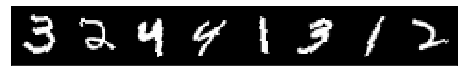

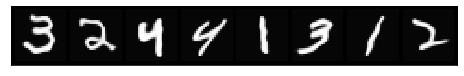

Epoch: 20 Iter: 2399 Loss: 0.00699 Recon: 0.00632 VQ: 0.00067 Perplexity: 18.77201
Epoch: 20 Iter: 2439 Loss: 0.00691 Recon: 0.00624 VQ: 0.00067 Perplexity: 18.79522
Epoch: 21 Iter: 2479 Loss: 0.007 Recon: 0.00633 VQ: 0.00067 Perplexity: 18.74862
Epoch: 21 Iter: 2519 Loss: 0.00679 Recon: 0.00615 VQ: 0.00064 Perplexity: 18.56584
Epoch: 21 Iter: 2559 Loss: 0.00664 Recon: 0.00601 VQ: 0.00064 Perplexity: 19.10691
Epoch: 22 Iter: 2599 Loss: 0.00654 Recon: 0.00591 VQ: 0.00063 Perplexity: 19.18852
Epoch: 22 Iter: 2639 Loss: 0.00654 Recon: 0.0059 VQ: 0.00064 Perplexity: 19.13167
Epoch: 22 Iter: 2679 Loss: 0.00654 Recon: 0.00592 VQ: 0.00062 Perplexity: 18.86374
Epoch: 23 Iter: 2719 Loss: 0.00661 Recon: 0.006 VQ: 0.00061 Perplexity: 19.49769
Epoch: 23 Iter: 2759 Loss: 0.00648 Recon: 0.00588 VQ: 0.00061 Perplexity: 19.39643
Epoch: 23 Iter: 2799 Loss: 0.0063 Recon: 0.00571 VQ: 0.00059 Perplexity: 19.66782
Epoch: 24 Iter: 2839 Loss: 0.00622 Recon: 0.00563 VQ: 0.00059 Perplexity: 19.81315
Epoch: 24 

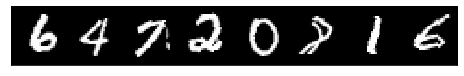

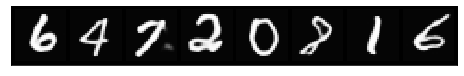

Epoch: 25 Iter: 2959 Loss: 0.00614 Recon: 0.00557 VQ: 0.00056 Perplexity: 19.99448
Epoch: 25 Iter: 2999 Loss: 0.00633 Recon: 0.00577 VQ: 0.00057 Perplexity: 19.53395
Epoch: 25 Iter: 3039 Loss: 0.006 Recon: 0.00546 VQ: 0.00054 Perplexity: 19.76755
Epoch: 26 Iter: 3079 Loss: 0.00609 Recon: 0.00555 VQ: 0.00054 Perplexity: 20.08457
Epoch: 26 Iter: 3119 Loss: 0.00601 Recon: 0.00546 VQ: 0.00055 Perplexity: 20.13649
Epoch: 26 Iter: 3159 Loss: 0.00602 Recon: 0.00546 VQ: 0.00056 Perplexity: 20.37393
Epoch: 27 Iter: 3199 Loss: 0.00606 Recon: 0.00552 VQ: 0.00054 Perplexity: 20.09747
Epoch: 27 Iter: 3239 Loss: 0.00593 Recon: 0.0054 VQ: 0.00054 Perplexity: 20.31828
Epoch: 27 Iter: 3279 Loss: 0.00602 Recon: 0.00548 VQ: 0.00054 Perplexity: 20.40276
Epoch: 28 Iter: 3319 Loss: 0.0059 Recon: 0.00537 VQ: 0.00052 Perplexity: 20.64184
Epoch: 28 Iter: 3359 Loss: 0.00608 Recon: 0.00556 VQ: 0.00053 Perplexity: 20.69277
Epoch: 28 Iter: 3399 Loss: 0.00632 Recon: 0.00576 VQ: 0.00055 Perplexity: 20.77732
Epoch: 2

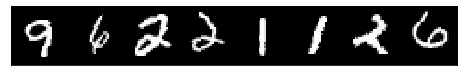

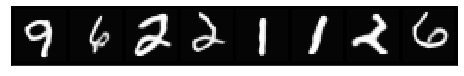

Epoch: 30 Iter: 3559 Loss: 0.00568 Recon: 0.00516 VQ: 0.00052 Perplexity: 21.13443
Epoch: 30 Iter: 3599 Loss: 0.0057 Recon: 0.0052 VQ: 0.0005 Perplexity: 21.26654
Epoch: 30 Iter: 3639 Loss: 0.00568 Recon: 0.00519 VQ: 0.0005 Perplexity: 21.02272
Epoch: 31 Iter: 3679 Loss: 0.00563 Recon: 0.00513 VQ: 0.0005 Perplexity: 21.3921
Epoch: 31 Iter: 3719 Loss: 0.00561 Recon: 0.00514 VQ: 0.00047 Perplexity: 21.28771
Epoch: 31 Iter: 3759 Loss: 0.0057 Recon: 0.00519 VQ: 0.00051 Perplexity: 21.30403
Epoch: 32 Iter: 3799 Loss: 0.00547 Recon: 0.00498 VQ: 0.00049 Perplexity: 21.70996
Epoch: 32 Iter: 3839 Loss: 0.00544 Recon: 0.00497 VQ: 0.00047 Perplexity: 21.60974
Epoch: 32 Iter: 3879 Loss: 0.00568 Recon: 0.0052 VQ: 0.00048 Perplexity: 21.52658
Epoch: 33 Iter: 3919 Loss: 0.00532 Recon: 0.00485 VQ: 0.00047 Perplexity: 21.66471
Epoch: 33 Iter: 3959 Loss: 0.00515 Recon: 0.00467 VQ: 0.00048 Perplexity: 21.35736
Epoch: 33 Iter: 3999 Loss: 0.00537 Recon: 0.00489 VQ: 0.00047 Perplexity: 22.17724
Epoch: 34 It

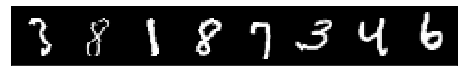

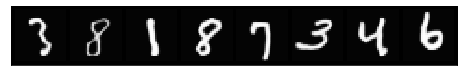

Epoch: 35 Iter: 4159 Loss: 0.00522 Recon: 0.00477 VQ: 0.00045 Perplexity: 22.7261
Epoch: 35 Iter: 4199 Loss: 0.00537 Recon: 0.00493 VQ: 0.00044 Perplexity: 22.72806
Epoch: 35 Iter: 4239 Loss: 0.00519 Recon: 0.00475 VQ: 0.00045 Perplexity: 22.52193
Epoch: 36 Iter: 4279 Loss: 0.00503 Recon: 0.0046 VQ: 0.00043 Perplexity: 22.76151
Epoch: 36 Iter: 4319 Loss: 0.00517 Recon: 0.00473 VQ: 0.00044 Perplexity: 22.72666
Epoch: 36 Iter: 4359 Loss: 0.00493 Recon: 0.00451 VQ: 0.00042 Perplexity: 22.80527
Epoch: 37 Iter: 4399 Loss: 0.00516 Recon: 0.00473 VQ: 0.00043 Perplexity: 23.3307
Epoch: 37 Iter: 4439 Loss: 0.00513 Recon: 0.00468 VQ: 0.00045 Perplexity: 23.06576
Epoch: 37 Iter: 4479 Loss: 0.00519 Recon: 0.00475 VQ: 0.00044 Perplexity: 22.76859
Epoch: 38 Iter: 4519 Loss: 0.00479 Recon: 0.00439 VQ: 0.0004 Perplexity: 23.0549
Epoch: 38 Iter: 4559 Loss: 0.00492 Recon: 0.00451 VQ: 0.00041 Perplexity: 23.17761
Epoch: 38 Iter: 4599 Loss: 0.00481 Recon: 0.00442 VQ: 0.00039 Perplexity: 23.22305
Epoch: 39

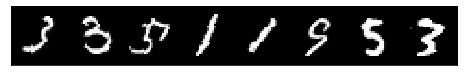

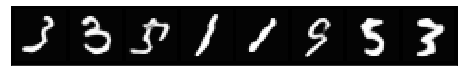

Epoch: 40 Iter: 4759 Loss: 0.0047 Recon: 0.00432 VQ: 0.00038 Perplexity: 23.53391
Epoch: 40 Iter: 4799 Loss: 0.00466 Recon: 0.00428 VQ: 0.00038 Perplexity: 23.45504
Epoch: 41 Iter: 4839 Loss: 0.00471 Recon: 0.00433 VQ: 0.00038 Perplexity: 23.46667
Epoch: 41 Iter: 4879 Loss: 0.00466 Recon: 0.00427 VQ: 0.00039 Perplexity: 23.61734
Epoch: 41 Iter: 4919 Loss: 0.00474 Recon: 0.00436 VQ: 0.00038 Perplexity: 23.56326
Epoch: 42 Iter: 4959 Loss: 0.00485 Recon: 0.00447 VQ: 0.00038 Perplexity: 23.83133
Epoch: 42 Iter: 4999 Loss: 0.0046 Recon: 0.00422 VQ: 0.00038 Perplexity: 23.92377
Epoch: 42 Iter: 5039 Loss: 0.00488 Recon: 0.00449 VQ: 0.00038 Perplexity: 23.75488
Epoch: 43 Iter: 5079 Loss: 0.00469 Recon: 0.00432 VQ: 0.00038 Perplexity: 23.9404
Epoch: 43 Iter: 5119 Loss: 0.00469 Recon: 0.00432 VQ: 0.00037 Perplexity: 23.86679
Epoch: 43 Iter: 5159 Loss: 0.00472 Recon: 0.00433 VQ: 0.00039 Perplexity: 23.96198
Epoch: 44 Iter: 5199 Loss: 0.00468 Recon: 0.00431 VQ: 0.00037 Perplexity: 23.84933
Epoch: 

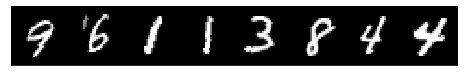

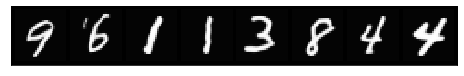

Epoch: 45 Iter: 5319 Loss: 0.00462 Recon: 0.00426 VQ: 0.00036 Perplexity: 24.03139
Epoch: 45 Iter: 5359 Loss: 0.00473 Recon: 0.00437 VQ: 0.00036 Perplexity: 24.16687
Epoch: 45 Iter: 5399 Loss: 0.00457 Recon: 0.00421 VQ: 0.00036 Perplexity: 24.13198
Epoch: 46 Iter: 5439 Loss: 0.00461 Recon: 0.00426 VQ: 0.00035 Perplexity: 24.13372
Epoch: 46 Iter: 5479 Loss: 0.00468 Recon: 0.00432 VQ: 0.00036 Perplexity: 24.29938
Epoch: 46 Iter: 5519 Loss: 0.0047 Recon: 0.00435 VQ: 0.00035 Perplexity: 24.31151
Epoch: 47 Iter: 5559 Loss: 0.00476 Recon: 0.0044 VQ: 0.00036 Perplexity: 24.34185
Epoch: 47 Iter: 5599 Loss: 0.0045 Recon: 0.00416 VQ: 0.00034 Perplexity: 24.46106
Epoch: 47 Iter: 5639 Loss: 0.00461 Recon: 0.00426 VQ: 0.00035 Perplexity: 24.45743
Epoch: 48 Iter: 5679 Loss: 0.00477 Recon: 0.00441 VQ: 0.00036 Perplexity: 24.50731
Epoch: 48 Iter: 5719 Loss: 0.00465 Recon: 0.00429 VQ: 0.00035 Perplexity: 24.44069
Epoch: 48 Iter: 5759 Loss: 0.00467 Recon: 0.00431 VQ: 0.00036 Perplexity: 24.49281
Epoch: 

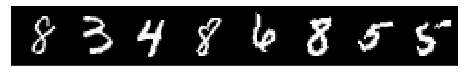

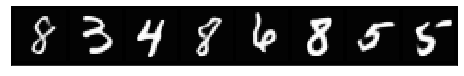

Epoch: 50 Iter: 5919 Loss: 0.00469 Recon: 0.00434 VQ: 0.00034 Perplexity: 24.6028
Epoch: 50 Iter: 5959 Loss: 0.0043 Recon: 0.00397 VQ: 0.00033 Perplexity: 24.56689
Epoch: 50 Iter: 5999 Loss: 0.00444 Recon: 0.00411 VQ: 0.00033 Perplexity: 24.65108
Epoch: 51 Iter: 6039 Loss: 0.0047 Recon: 0.00435 VQ: 0.00035 Perplexity: 24.76384
Epoch: 51 Iter: 6079 Loss: 0.00453 Recon: 0.0042 VQ: 0.00034 Perplexity: 24.71765
Epoch: 51 Iter: 6119 Loss: 0.00453 Recon: 0.00419 VQ: 0.00034 Perplexity: 24.80193
Epoch: 52 Iter: 6159 Loss: 0.00461 Recon: 0.00427 VQ: 0.00034 Perplexity: 24.79493
Epoch: 52 Iter: 6199 Loss: 0.00441 Recon: 0.00409 VQ: 0.00032 Perplexity: 24.85544
Epoch: 52 Iter: 6239 Loss: 0.00446 Recon: 0.00414 VQ: 0.00032 Perplexity: 24.82026
Epoch: 53 Iter: 6279 Loss: 0.00481 Recon: 0.00446 VQ: 0.00035 Perplexity: 24.87457
Epoch: 53 Iter: 6319 Loss: 0.00469 Recon: 0.00436 VQ: 0.00034 Perplexity: 24.92003
Epoch: 53 Iter: 6359 Loss: 0.00463 Recon: 0.0043 VQ: 0.00033 Perplexity: 25.01035
Epoch: 54

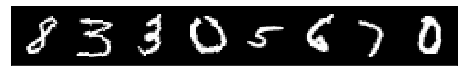

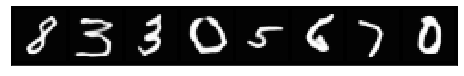

Epoch: 55 Iter: 6519 Loss: 0.00435 Recon: 0.00403 VQ: 0.00031 Perplexity: 25.17332
Epoch: 55 Iter: 6559 Loss: 0.0045 Recon: 0.00419 VQ: 0.00031 Perplexity: 25.1468
Epoch: 55 Iter: 6599 Loss: 0.00442 Recon: 0.0041 VQ: 0.00032 Perplexity: 25.11201
Epoch: 56 Iter: 6639 Loss: 0.00447 Recon: 0.00415 VQ: 0.00032 Perplexity: 25.38809
Epoch: 56 Iter: 6679 Loss: 0.00473 Recon: 0.00442 VQ: 0.00032 Perplexity: 25.29881
Epoch: 56 Iter: 6719 Loss: 0.00446 Recon: 0.00412 VQ: 0.00033 Perplexity: 25.37809
Epoch: 57 Iter: 6759 Loss: 0.00446 Recon: 0.00414 VQ: 0.00032 Perplexity: 25.28304
Epoch: 57 Iter: 6799 Loss: 0.00449 Recon: 0.00418 VQ: 0.00032 Perplexity: 25.39965
Epoch: 57 Iter: 6839 Loss: 0.00444 Recon: 0.00412 VQ: 0.00032 Perplexity: 25.52445
Epoch: 58 Iter: 6879 Loss: 0.00452 Recon: 0.0042 VQ: 0.00032 Perplexity: 25.5015
Epoch: 58 Iter: 6919 Loss: 0.00439 Recon: 0.00408 VQ: 0.00031 Perplexity: 25.55469
Epoch: 58 Iter: 6959 Loss: 0.00447 Recon: 0.00416 VQ: 0.00031 Perplexity: 25.43968
Epoch: 59

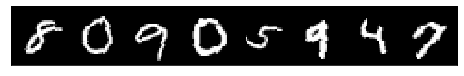

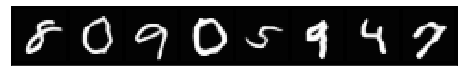

Epoch: 60 Iter: 7119 Loss: 0.00455 Recon: 0.00424 VQ: 0.0003 Perplexity: 25.56172
Epoch: 60 Iter: 7159 Loss: 0.00447 Recon: 0.00417 VQ: 0.0003 Perplexity: 25.66292
Epoch: 61 Iter: 7199 Loss: 0.00439 Recon: 0.00409 VQ: 0.0003 Perplexity: 25.53195
Epoch: 61 Iter: 7239 Loss: 0.0043 Recon: 0.004 VQ: 0.0003 Perplexity: 25.54542
Epoch: 61 Iter: 7279 Loss: 0.00435 Recon: 0.00405 VQ: 0.00029 Perplexity: 25.50301
Epoch: 62 Iter: 7319 Loss: 0.00423 Recon: 0.00392 VQ: 0.00031 Perplexity: 25.44421
Epoch: 62 Iter: 7359 Loss: 0.00429 Recon: 0.00399 VQ: 0.0003 Perplexity: 25.52476
Epoch: 62 Iter: 7399 Loss: 0.00431 Recon: 0.00401 VQ: 0.0003 Perplexity: 25.65477
Epoch: 63 Iter: 7439 Loss: 0.00424 Recon: 0.00393 VQ: 0.00031 Perplexity: 25.58445
Epoch: 63 Iter: 7479 Loss: 0.00444 Recon: 0.00414 VQ: 0.0003 Perplexity: 25.59653
Epoch: 63 Iter: 7519 Loss: 0.00415 Recon: 0.00386 VQ: 0.0003 Perplexity: 25.52869
Epoch: 64 Iter: 7559 Loss: 0.00417 Recon: 0.00388 VQ: 0.00029 Perplexity: 25.66604
Epoch: 64 Iter:

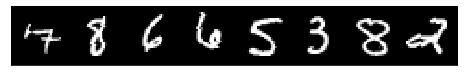

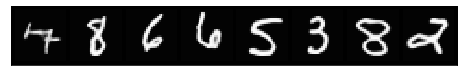

Epoch: 65 Iter: 7679 Loss: 0.00429 Recon: 0.00399 VQ: 0.0003 Perplexity: 25.68622
Epoch: 65 Iter: 7719 Loss: 0.0042 Recon: 0.00391 VQ: 0.00029 Perplexity: 25.73389
Epoch: 65 Iter: 7759 Loss: 0.00427 Recon: 0.00398 VQ: 0.00029 Perplexity: 25.74476
Epoch: 66 Iter: 7799 Loss: 0.00447 Recon: 0.00417 VQ: 0.00029 Perplexity: 25.8323
Epoch: 66 Iter: 7839 Loss: 0.00437 Recon: 0.00408 VQ: 0.00029 Perplexity: 25.67357
Epoch: 66 Iter: 7879 Loss: 0.00438 Recon: 0.00408 VQ: 0.00031 Perplexity: 25.80364
Epoch: 67 Iter: 7919 Loss: 0.00441 Recon: 0.00411 VQ: 0.00029 Perplexity: 25.90845
Epoch: 67 Iter: 7959 Loss: 0.00414 Recon: 0.00386 VQ: 0.00028 Perplexity: 25.64008
Epoch: 67 Iter: 7999 Loss: 0.00441 Recon: 0.00411 VQ: 0.0003 Perplexity: 25.94096
Epoch: 68 Iter: 8039 Loss: 0.00409 Recon: 0.0038 VQ: 0.00029 Perplexity: 25.85773
Epoch: 68 Iter: 8079 Loss: 0.00426 Recon: 0.00397 VQ: 0.00029 Perplexity: 25.73104
Epoch: 68 Iter: 8119 Loss: 0.00454 Recon: 0.00424 VQ: 0.00029 Perplexity: 25.9039
Epoch: 69 

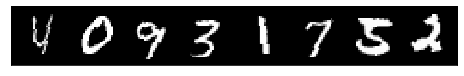

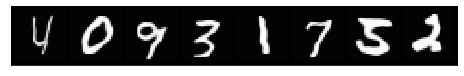

Epoch: 70 Iter: 8279 Loss: 0.0042 Recon: 0.00391 VQ: 0.00029 Perplexity: 25.85796
Epoch: 70 Iter: 8319 Loss: 0.00469 Recon: 0.00439 VQ: 0.00029 Perplexity: 25.85194
Epoch: 70 Iter: 8359 Loss: 0.00409 Recon: 0.00381 VQ: 0.00028 Perplexity: 25.96904
Epoch: 71 Iter: 8399 Loss: 0.00404 Recon: 0.00376 VQ: 0.00028 Perplexity: 25.96822
Epoch: 71 Iter: 8439 Loss: 0.0042 Recon: 0.00391 VQ: 0.00029 Perplexity: 25.76008
Epoch: 71 Iter: 8479 Loss: 0.00418 Recon: 0.0039 VQ: 0.00028 Perplexity: 25.98469
Epoch: 72 Iter: 8519 Loss: 0.00419 Recon: 0.00393 VQ: 0.00027 Perplexity: 25.92365
Epoch: 72 Iter: 8559 Loss: 0.00428 Recon: 0.004 VQ: 0.00028 Perplexity: 26.02051
Epoch: 72 Iter: 8599 Loss: 0.00421 Recon: 0.00394 VQ: 0.00027 Perplexity: 25.90748
Epoch: 73 Iter: 8639 Loss: 0.00408 Recon: 0.0038 VQ: 0.00028 Perplexity: 25.99187
Epoch: 73 Iter: 8679 Loss: 0.00441 Recon: 0.00411 VQ: 0.0003 Perplexity: 26.13921
Epoch: 73 Iter: 8719 Loss: 0.00415 Recon: 0.00388 VQ: 0.00027 Perplexity: 26.08797
Epoch: 74 I

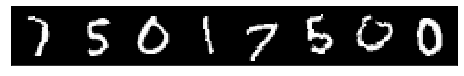

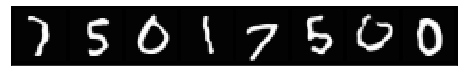

Epoch: 75 Iter: 8879 Loss: 0.00418 Recon: 0.00389 VQ: 0.00029 Perplexity: 26.18769
Epoch: 75 Iter: 8919 Loss: 0.00438 Recon: 0.0041 VQ: 0.00029 Perplexity: 26.22102
Epoch: 75 Iter: 8959 Loss: 0.00418 Recon: 0.0039 VQ: 0.00028 Perplexity: 26.16312
Epoch: 76 Iter: 8999 Loss: 0.00418 Recon: 0.0039 VQ: 0.00028 Perplexity: 26.19139
Epoch: 76 Iter: 9039 Loss: 0.00412 Recon: 0.00386 VQ: 0.00026 Perplexity: 26.21027
Epoch: 76 Iter: 9079 Loss: 0.0041 Recon: 0.00384 VQ: 0.00026 Perplexity: 26.08078
Epoch: 77 Iter: 9119 Loss: 0.00426 Recon: 0.004 VQ: 0.00026 Perplexity: 26.16499
Epoch: 77 Iter: 9159 Loss: 0.00432 Recon: 0.00404 VQ: 0.00028 Perplexity: 26.25184
Epoch: 77 Iter: 9199 Loss: 0.00435 Recon: 0.00408 VQ: 0.00027 Perplexity: 26.19067
Epoch: 78 Iter: 9239 Loss: 0.00411 Recon: 0.00385 VQ: 0.00026 Perplexity: 26.32796
Epoch: 78 Iter: 9279 Loss: 0.00417 Recon: 0.0039 VQ: 0.00026 Perplexity: 26.25266
Epoch: 78 Iter: 9319 Loss: 0.00416 Recon: 0.00389 VQ: 0.00027 Perplexity: 26.32207
Epoch: 79 I

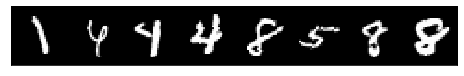

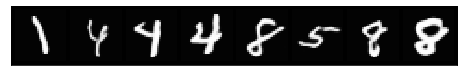

Epoch: 80 Iter: 9479 Loss: 0.00411 Recon: 0.00385 VQ: 0.00026 Perplexity: 26.44374
Epoch: 80 Iter: 9519 Loss: 0.00393 Recon: 0.00366 VQ: 0.00026 Perplexity: 26.19007
Epoch: 81 Iter: 9559 Loss: 0.00416 Recon: 0.0039 VQ: 0.00026 Perplexity: 26.34002
Epoch: 81 Iter: 9599 Loss: 0.00414 Recon: 0.00388 VQ: 0.00026 Perplexity: 26.3632
Epoch: 81 Iter: 9639 Loss: 0.0042 Recon: 0.00392 VQ: 0.00028 Perplexity: 26.46568
Epoch: 82 Iter: 9679 Loss: 0.00405 Recon: 0.00379 VQ: 0.00026 Perplexity: 26.33338
Epoch: 82 Iter: 9719 Loss: 0.0041 Recon: 0.00384 VQ: 0.00026 Perplexity: 26.45482
Epoch: 82 Iter: 9759 Loss: 0.004 Recon: 0.00374 VQ: 0.00026 Perplexity: 26.40951
Epoch: 83 Iter: 9799 Loss: 0.00404 Recon: 0.00379 VQ: 0.00025 Perplexity: 26.34771
Epoch: 83 Iter: 9839 Loss: 0.00412 Recon: 0.00387 VQ: 0.00025 Perplexity: 26.33199
Epoch: 83 Iter: 9879 Loss: 0.00394 Recon: 0.00369 VQ: 0.00026 Perplexity: 26.35579
Epoch: 84 Iter: 9919 Loss: 0.00418 Recon: 0.00393 VQ: 0.00025 Perplexity: 26.37179
Epoch: 84 

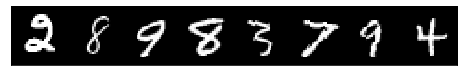

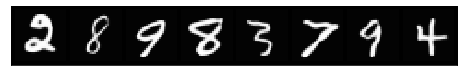

Epoch: 85 Iter: 10039 Loss: 0.00407 Recon: 0.00382 VQ: 0.00025 Perplexity: 26.49588
Epoch: 85 Iter: 10079 Loss: 0.00398 Recon: 0.00373 VQ: 0.00025 Perplexity: 26.4096
Epoch: 85 Iter: 10119 Loss: 0.00422 Recon: 0.00396 VQ: 0.00025 Perplexity: 26.44791
Epoch: 86 Iter: 10159 Loss: 0.00403 Recon: 0.00378 VQ: 0.00025 Perplexity: 26.43869
Epoch: 86 Iter: 10199 Loss: 0.00408 Recon: 0.00383 VQ: 0.00025 Perplexity: 26.42747
Epoch: 86 Iter: 10239 Loss: 0.00418 Recon: 0.00392 VQ: 0.00026 Perplexity: 26.47318
Epoch: 87 Iter: 10279 Loss: 0.00408 Recon: 0.00382 VQ: 0.00025 Perplexity: 26.50919
Epoch: 87 Iter: 10319 Loss: 0.00425 Recon: 0.00399 VQ: 0.00026 Perplexity: 26.63588
Epoch: 87 Iter: 10359 Loss: 0.00408 Recon: 0.00383 VQ: 0.00025 Perplexity: 26.55176
Epoch: 88 Iter: 10399 Loss: 0.00409 Recon: 0.00383 VQ: 0.00026 Perplexity: 26.53028
Epoch: 88 Iter: 10439 Loss: 0.00412 Recon: 0.00388 VQ: 0.00025 Perplexity: 26.51874
Epoch: 88 Iter: 10479 Loss: 0.00399 Recon: 0.00374 VQ: 0.00025 Perplexity: 26

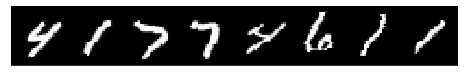

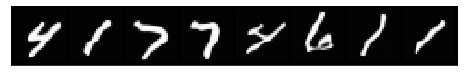

Epoch: 90 Iter: 10639 Loss: 0.00419 Recon: 0.00394 VQ: 0.00024 Perplexity: 26.55517
Epoch: 90 Iter: 10679 Loss: 0.00411 Recon: 0.00385 VQ: 0.00025 Perplexity: 26.48426
Epoch: 90 Iter: 10719 Loss: 0.00416 Recon: 0.00391 VQ: 0.00025 Perplexity: 26.53271
Epoch: 91 Iter: 10759 Loss: 0.00414 Recon: 0.00389 VQ: 0.00025 Perplexity: 26.70853
Epoch: 91 Iter: 10799 Loss: 0.00405 Recon: 0.0038 VQ: 0.00025 Perplexity: 26.58513
Epoch: 91 Iter: 10839 Loss: 0.00427 Recon: 0.00402 VQ: 0.00025 Perplexity: 26.52018
Epoch: 92 Iter: 10879 Loss: 0.00423 Recon: 0.00398 VQ: 0.00025 Perplexity: 26.60332
Epoch: 92 Iter: 10919 Loss: 0.00412 Recon: 0.00387 VQ: 0.00026 Perplexity: 26.51447
Epoch: 92 Iter: 10959 Loss: 0.00413 Recon: 0.00387 VQ: 0.00026 Perplexity: 26.67312
Epoch: 93 Iter: 10999 Loss: 0.00415 Recon: 0.00389 VQ: 0.00026 Perplexity: 26.59411
Epoch: 93 Iter: 11039 Loss: 0.00405 Recon: 0.0038 VQ: 0.00024 Perplexity: 26.60448
Epoch: 93 Iter: 11079 Loss: 0.00398 Recon: 0.00374 VQ: 0.00024 Perplexity: 26.

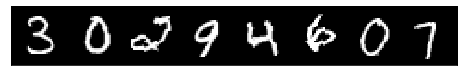

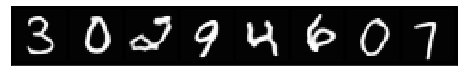

Epoch: 95 Iter: 11239 Loss: 0.00402 Recon: 0.00377 VQ: 0.00024 Perplexity: 26.48433
Epoch: 95 Iter: 11279 Loss: 0.00402 Recon: 0.00378 VQ: 0.00024 Perplexity: 26.66613
Epoch: 95 Iter: 11319 Loss: 0.00419 Recon: 0.00395 VQ: 0.00024 Perplexity: 26.69758
Epoch: 96 Iter: 11359 Loss: 0.00399 Recon: 0.00374 VQ: 0.00025 Perplexity: 26.67035
Epoch: 96 Iter: 11399 Loss: 0.00446 Recon: 0.0042 VQ: 0.00026 Perplexity: 26.77732
Epoch: 96 Iter: 11439 Loss: 0.0041 Recon: 0.00385 VQ: 0.00025 Perplexity: 26.73165
Epoch: 97 Iter: 11479 Loss: 0.00401 Recon: 0.00377 VQ: 0.00024 Perplexity: 26.80726
Epoch: 97 Iter: 11519 Loss: 0.00389 Recon: 0.00365 VQ: 0.00024 Perplexity: 26.7653
Epoch: 97 Iter: 11559 Loss: 0.0041 Recon: 0.00386 VQ: 0.00025 Perplexity: 26.68668
Epoch: 98 Iter: 11599 Loss: 0.00421 Recon: 0.00396 VQ: 0.00026 Perplexity: 26.77628
Epoch: 98 Iter: 11639 Loss: 0.00412 Recon: 0.00389 VQ: 0.00024 Perplexity: 26.80356
Epoch: 98 Iter: 11679 Loss: 0.00408 Recon: 0.00384 VQ: 0.00024 Perplexity: 26.86

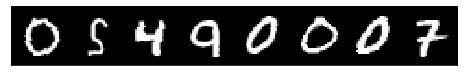

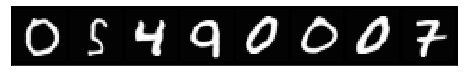

In [7]:
print("Device in use: {}".format(CONFIG.DEVICE))

model.train()
model.to(CONFIG.DEVICE)

iteration = 0
for epoch in range(CONFIG.NUM_EPOCHS):
    for x, _ in train_loader:
        x = x.to(CONFIG.DEVICE)

        vq_loss, quantized, x_recon, perplexity = model(x)

        recon_error = F.mse_loss(x_recon, x)
        loss = recon_error + vq_loss
        loss.backward()

        optimizer_encdec.step()
        optimizer_encdec.zero_grad()

        optimizer_quantizer.step()
        optimizer_quantizer.zero_grad()
        
        if (iteration + 1) % 40 == 0:
            print("Epoch: {} Iter: {} Loss: {} Recon: {} VQ: {} Perplexity: {}".format(
                epoch, 
                iteration, 
                round(loss.item(), 5),
                round(recon_error.item(), 5),
                round(vq_loss.item(), 5),
                round(perplexity.item(), 5)
            ))

        iteration += 1
    
    if (epoch + 1) % 5 == 0:
        print("====== Epoch {} ======".format(epoch))
        img_grid = make_grid(x[:8, :, :, :].detach().cpu())
        show(img_grid)
        img_recon_grid = make_grid(x_recon[:8, :, :, :].detach().cpu())
        show(img_recon_grid)
        print("======================")

    lr_scheduler_encdec.step()
    lr_scheduler_quantizer.step()


In [8]:
model.save_model(
    root_path=CONFIG.save_model_path,
    model_name=CONFIG.model_name)